In [10]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using LinearAlgebra, Plots
using ProgressMeter
import ForwardDiff as FD
import Convex as cvx
import ECOS

include(joinpath(@__DIR__,"utils","fmincon.jl"))

  Activating environment at `c:\CMU_Spring\OptimalSailboat\Project.toml`


fmincon (generic function with 1 method)

In [18]:
# Using the NACA0015 airfoil data from the file NACA0015.dat
# You can find the calculator at : http://airfoiltools.com/polar/details?polar=xf-naca0015-il-1000000


function CL_CD_from_dat(datfile, verbose=false)
    """
    Reads a .dat file and returns the alpha, CL, and CD data.
    """

    lines = readlines(datfile)

    alpha = Float64[]
    CL = Float64[]
    CD = Float64[]

    for line in lines[8:end]  
        
        columns = split(line)

        if verbose
            println("alpha = ", alpha)
            println("CL = ", CL)
            println("CD = ", CD)
        end

        push!(alpha, parse(Float64, columns[1]))
        push!(CL, parse(Float64, columns[2]))
        push!(CD, parse(Float64, columns[3]))
    end

    return alpha, CL, CD
end


CL_CD_from_dat (generic function with 2 methods)

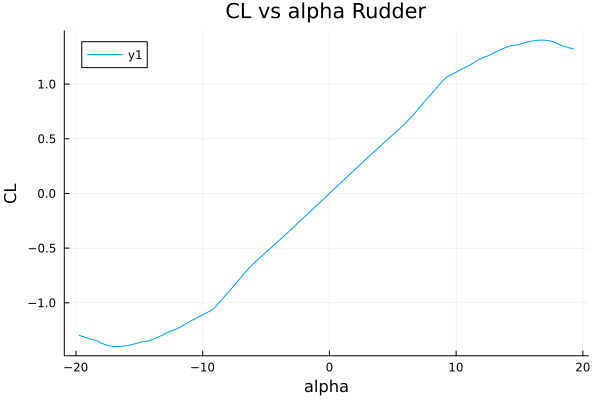

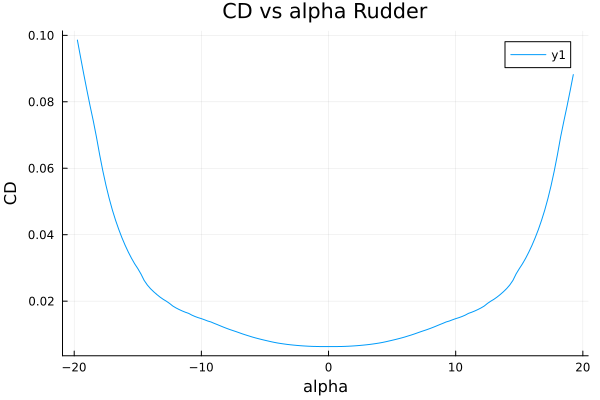

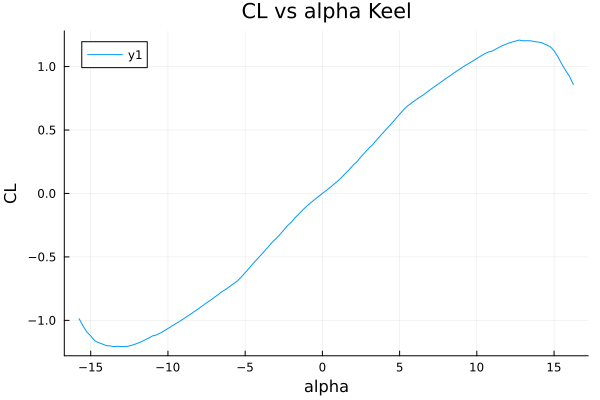

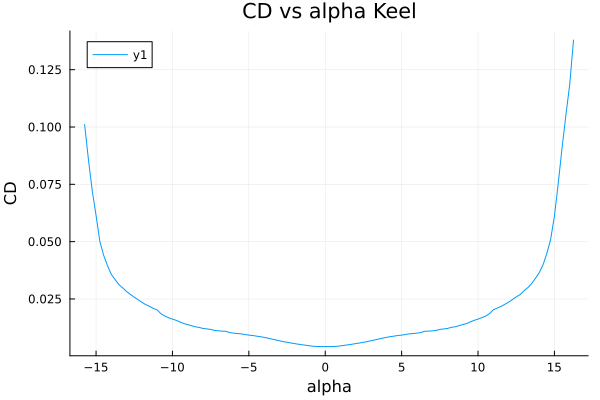

In [21]:

# CL and CD data from the NACA0015 airfoil
# This was the rudder model used in the paper we are referencing
dat = "NACA_data/NACA0015.dat"
alpha, CL, CD = CL_CD_from_dat(dat)

# Plot the data
p1 = plot(alpha, CL, xlabel="alpha", ylabel="CL", title="CL vs alpha Rudder")
p2 = plot(alpha, CD, xlabel="alpha", ylabel="CD", title="CD vs alpha Rudder")

display(p1)
display(p2)


# CL and CD data from the NACA009 airfoil
# This was the keel model used in the paper we are referencing
dat = "NACA_data/NACA009.dat"
alpha, CL, CD = CL_CD_from_dat(dat)

# Plot the data
p1 = plot(alpha, CL, xlabel="alpha", ylabel="CL", title="CL vs alpha Keel")
p2 = plot(alpha, CD, xlabel="alpha", ylabel="CD", title="CD vs alpha Keel")

display(p1)
display(p2)


